In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 假设你已经有了 DataFrame，这里只是示例，你需要根据实际情况加载数据
# 示例数据加载
# data = pd.read_csv('your_data.csv')
DATA_PATH = '/kaggle/input/bi-attrition-predict/'
data = pd.read_csv('train.csv')
# test = pd.read_csv(f'{DATA_PATH}/test.csv')
# 这里假设你已经有了 DataFrame，直接使用你提供的信息构建示例数据
import numpy as np

# 数据预处理
# 对分类变量进行独热编码
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# 分离特征和目标变量
X = data_encoded.drop('Attrition_Yes', axis=1)  # 假设目标变量是 Attrition，且编码后为 Attrition_Yes
y = data_encoded['Attrition_Yes']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2:8 分离数据集和训练集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"逻辑回归模型准确率: {accuracy_logreg}")

# SVM 模型
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM 模型准确率: {accuracy_svm}")

逻辑回归模型准确率: 1.0
SVM 模型准确率: 0.9957627118644068


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:

# 假设数据已经加载到 DataFrame df 中
df = pd.read_csv('data.csv')

# 1. 数据预处理
# 分离特征和目标变量
X = df.drop(columns=['Credit Default'])
y = df['Credit Default']

# 定义数值和分类特征
numerical_features = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 
                      'Years of Credit History', 'Maximum Open Credit', 
                      'Number of Credit Problems', 'Months since last delinquent', 
                      'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 
                      'Monthly Debt', 'Credit Score']
categorical_features = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

# 创建预处理 Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 用中位数填充缺失值
    ('scaler', StandardScaler())  # 标准化数值特征
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 用众数填充缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 2. 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 逻辑回归
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# 4. SVM
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', random_state=42))
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

c:\UserFiles\Anaconda3\envs\hh\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
Accuracy: 0.7686666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      1059
           1       0.89      0.24      0.38       441

    accuracy                           0.77      1500
   macro avg       0.82      0.62      0.62      1500
weighted avg       0.80      0.77      0.72      1500

SVM Results:
Accuracy: 0.764
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86      1059
           1       0.98      0.20      0.33       441

    accuracy                           0.76      1500
   macro avg       0.86      0.60      0.60      1500
weighted avg       0.82      0.76      0.70      1500



In [7]:
# 3. 定义 Optuna 目标函数
def objective_logistic(trial):
    # 定义超参数搜索空间
    C = trial.suggest_float('C', 0.01, 100, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    # 创建逻辑回归 Pipeline
    logistic_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, solver=solver, max_iter=max_iter, random_state=42))
    ])

    # 使用交叉验证评估模型
    score = cross_val_score(logistic_pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

def objective_svm(trial):
    # 定义超参数搜索空间
    C = trial.suggest_float('C', 0.01, 100, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    # 创建 SVM Pipeline
    svm_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(C=C, kernel=kernel, gamma=gamma, random_state=42))
    ])

    # 使用交叉验证评估模型
    score = cross_val_score(svm_pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# 4. 使用 Optuna 进行调参
# 逻辑回归调参
study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective_logistic, n_trials=20)

# SVM 调参
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=20)

# 5. 使用最佳参数训练模型
# 逻辑回归
best_params_logistic = study_logistic.best_params
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(**best_params_logistic, random_state=42))
])
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)
print("Logistic Regression Results:")
print("Best Parameters:", best_params_logistic)
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

# SVM
best_params_svm = study_svm.best_params
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(**best_params_svm, random_state=42))
])
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
print("SVM Results:")
print("Best Parameters:", best_params_svm)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

[I 2025-03-09 14:18:51,615] A new study created in memory with name: no-name-f06ad0b0-a45a-42c5-89ab-b464a3f0f439
[I 2025-03-09 14:18:52,378] Trial 0 finished with value: 0.775 and parameters: {'C': 0.027430602674501158, 'solver': 'sag', 'max_iter': 907}. Best is trial 0 with value: 0.775.
[I 2025-03-09 14:18:52,498] Trial 1 finished with value: 0.7738333333333333 and parameters: {'C': 0.011661123632373933, 'solver': 'lbfgs', 'max_iter': 429}. Best is trial 0 with value: 0.775.
[I 2025-03-09 14:18:55,454] Trial 2 finished with value: 0.7746666666666667 and parameters: {'C': 0.4172614569060097, 'solver': 'sag', 'max_iter': 993}. Best is trial 0 with value: 0.775.
[I 2025-03-09 14:18:55,938] Trial 3 finished with value: 0.7748333333333334 and parameters: {'C': 0.013677844397879703, 'solver': 'sag', 'max_iter': 657}. Best is trial 0 with value: 0.775.
[I 2025-03-09 14:18:56,224] Trial 4 finished with value: 0.774 and parameters: {'C': 1.593476762964584, 'solver': 'lbfgs', 'max_iter': 582}

Logistic Regression Results:
Best Parameters: {'C': 0.027430602674501158, 'solver': 'sag', 'max_iter': 907}
Accuracy: 0.768
SVM Results:
Best Parameters: {'C': 0.0625091282490611, 'kernel': 'poly', 'gamma': 'scale'}
Accuracy: 0.762


15min

In [ ]:
# 获取低方差特征


In [8]:
from sklearn.feature_selection import VarianceThreshold

# 计算特征的方差
selector = VarianceThreshold(threshold=0.01)  # 阈值设为 0.01
selector.fit(df[numerical_features])

# 获取低方差特征
low_var_features = [col for col in numerical_features if col not in df[numerical_features].columns[selector.get_support()]]
print("Low variance features to consider removing:", low_var_features)

Low variance features to consider removing: []


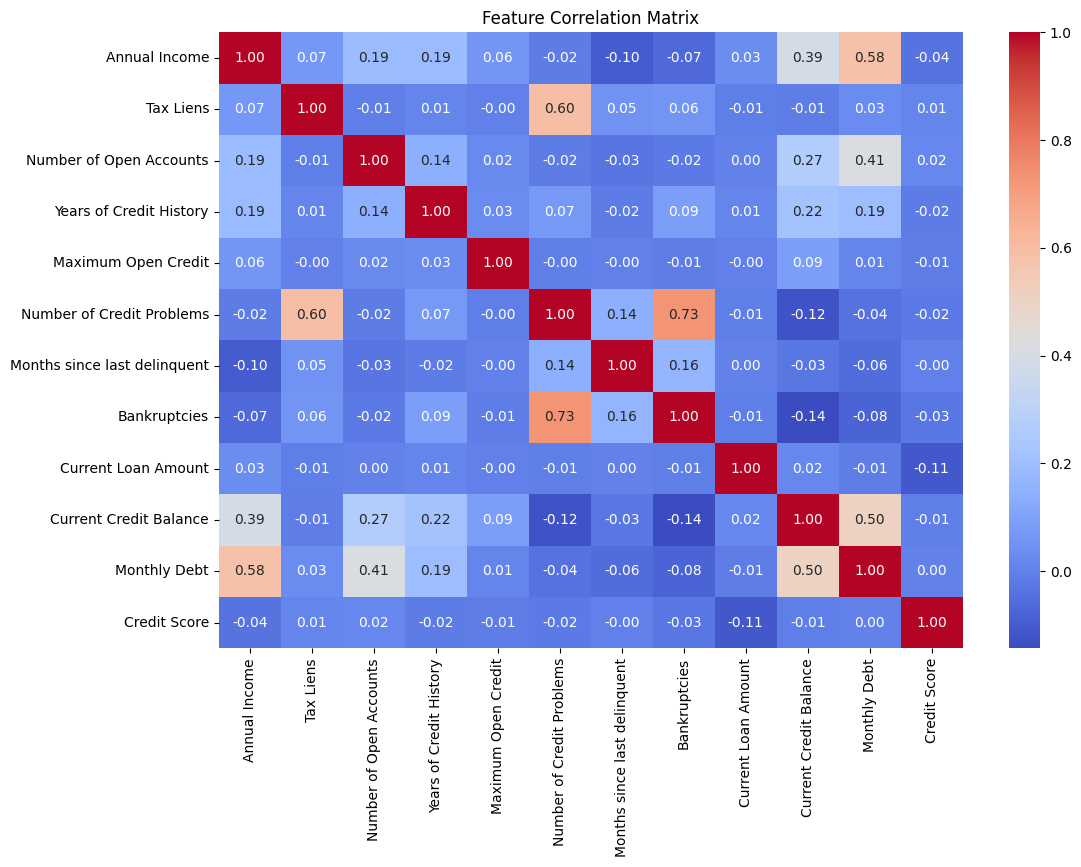

Highly correlated features to consider removing: set()


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 计算特征之间的相关性矩阵
corr_matrix = df[numerical_features].corr()

# 可视化相关性矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# 检查高度相关的特征对
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:  # 阈值设为 0.8
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to consider removing:", high_corr_features)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
import optuna.visualization as ov

# 假设数据已经加载到 DataFrame df 中
# df = pd.read_csv('your_data.csv')

# 1. 数据预处理
# 分离特征和目标变量
# X = df.drop(columns=['Credit Default'])
# y = df['Credit Default']

# 定义数值和分类特征
numerical_features = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 
                      'Years of Credit History', 'Maximum Open Credit', 
                      'Number of Credit Problems', 'Months since last delinquent', 
                      'Bankruptcies', 'Current Loan Amount', 'Current Credit Balance', 
                      'Monthly Debt', 'Credit Score']
categorical_features = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

# 创建预处理 Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # 用中位数填充缺失值
    ('scaler', StandardScaler())  # 标准化数值特征
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # 用众数填充缺失值
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot Encoding
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 2. 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 定义 Optuna 目标函数
def objective_logistic(trial):
    C = trial.suggest_float('C', 0.01, 100, log=True)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])  # 只保留稳定的优化器
    max_iter = trial.suggest_int('max_iter', 100, 10000)  # 增加上限

    logistic_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(C=C, solver=solver, max_iter=max_iter, random_state=42))
    ])

    score = cross_val_score(logistic_pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

def objective_svm(trial):
    C = trial.suggest_float('C', 0.01, 100, log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])  # 只保留常用 kernel
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto', 0.1, 0.01])  # 增加 gamma 选项

    svm_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(C=C, kernel=kernel, gamma=gamma, random_state=42))
    ])

    score = cross_val_score(svm_pipeline, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

# 4. 使用 Optuna 进行调参
study_logistic = optuna.create_study(
    direction='maximize',
    pruner=optuna.pruners.MedianPruner()  # 早停机制
)
study_logistic.optimize(objective_logistic, n_trials=100, n_jobs=-1)  # 增加试验次数并启用并行化

study_svm = optuna.create_study(
    direction='maximize',
    pruner=optuna.pruners.MedianPruner()  # 早停机制
)
study_svm.optimize(objective_svm, n_trials=100, n_jobs=-1)  # 增加试验次数并启用并行化

# 5. 可视化调参过程
ov.plot_optimization_history(study_logistic).show()
ov.plot_param_importances(study_logistic).show()

ov.plot_optimization_history(study_svm).show()
ov.plot_param_importances(study_svm).show()

# 6. 使用最佳参数训练模型
best_params_logistic = study_logistic.best_params
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(**best_params_logistic, random_state=42))
])
logistic_pipeline.fit(X_train, y_train)
y_pred_logistic = logistic_pipeline.predict(X_test)
print("Logistic Regression Results:")
print("Best Parameters:", best_params_logistic)
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))

best_params_svm = study_svm.best_params
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(**best_params_svm, random_state=42))
])
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)
print("SVM Results:")
print("Best Parameters:", best_params_svm)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

[I 2025-03-09 15:05:18,712] A new study created in memory with name: no-name-e2f302e5-dd7b-4e71-a372-d8cec4c39bc6
[I 2025-03-09 15:05:20,243] Trial 3 finished with value: 0.7753333333333333 and parameters: {'C': 0.20230394714493818, 'solver': 'liblinear', 'max_iter': 9402}. Best is trial 3 with value: 0.7753333333333333.
[I 2025-03-09 15:05:20,246] Trial 0 finished with value: 0.774 and parameters: {'C': 1.2677101978373073, 'solver': 'liblinear', 'max_iter': 5762}. Best is trial 3 with value: 0.7753333333333333.
[I 2025-03-09 15:05:20,250] Trial 5 finished with value: 0.773 and parameters: {'C': 43.80943758471237, 'solver': 'liblinear', 'max_iter': 8779}. Best is trial 3 with value: 0.7753333333333333.
[I 2025-03-09 15:05:20,267] Trial 12 finished with value: 0.7738333333333333 and parameters: {'C': 1.1495376348941428, 'solver': 'liblinear', 'max_iter': 5389}. Best is trial 3 with value: 0.7753333333333333.
[I 2025-03-09 15:05:20,270] Trial 6 finished with value: 0.773 and parameters: 

Logistic Regression Results:
Best Parameters: {'C': 0.20261463395644366, 'solver': 'lbfgs', 'max_iter': 920}
Accuracy: 0.77
SVM Results:
Best Parameters: {'C': 0.020893767582269872, 'kernel': 'linear', 'gamma': 'scale'}
Accuracy: 0.7633333333333333
